# 接線の方程式

In [1]:
from sympy import symbols, diff, init_printing
init_printing(use_latex="mathjax")

x = symbols('x')

# 関数f(x)のx = aにおける接線の式を返す関数
def line_tangent(f, a):
    return diff(f, x).subs(x, a)*(x - a) + f.subs(x, a)  

In [2]:
# x**2 のx = 2 を通る接線
line_tangent(x**2, 2)

4⋅x - 4

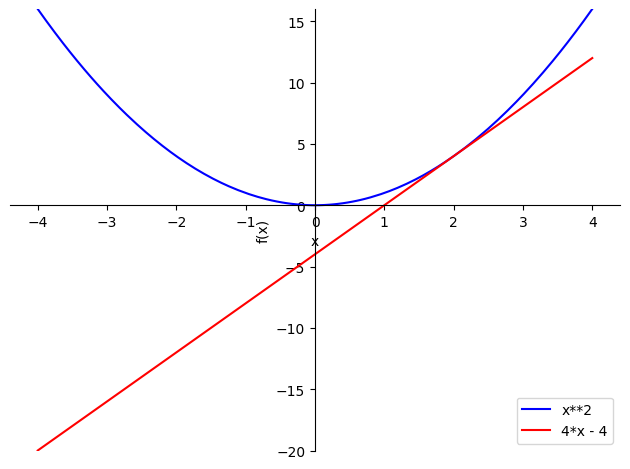

In [3]:
from sympy.plotting import plot
# x = 2 における接線のプロットを作成
a = 2
p = plot(x**2, line_tangent(x**2, a), (x, -4, 4),
        legend=True, show=False)
# プロットの色の設定
p[0].line_color = 'b'
p[1].line_color = 'r'
# 表示範囲の設定
p.ylim = (-20, 16)
# プロットの表示
p.show()

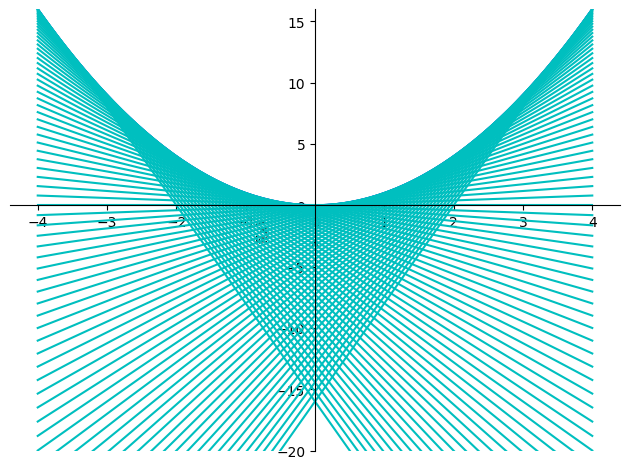

In [4]:
# NumPy を名前np でインポート
import numpy as np

# x**2 のプロットのオブジェクトを作る
p = plot(x**2, (x, -4, 4), show=False)
p[0].line_color = 'b'

# p に複数の接線をプロット
# 接点x 座標x = a は-4 から4 まで0.1 ステップで変化させる
for a in np.arange(-4, 4.1, 0.1):
    _p = plot(line_tangent(x**2, a), (x, -4, 4), show=False)
    _p[0].line_color = 'c'
    p.append(_p[0])
# 表示範囲の設定
p.ylim = (-20, 16)
# プロットの表示
p.show()

# 極大・極小

In [5]:
# g(x) を入力
g = 2*x**3 - 3*x**2 - 12*x + 5
g

   3      2           
2⋅x  - 3⋅x  - 12⋅x + 5

In [6]:
# g の微分dg を計算
dg = diff(g, x)
dg

   2           
6⋅x  - 6⋅x - 12

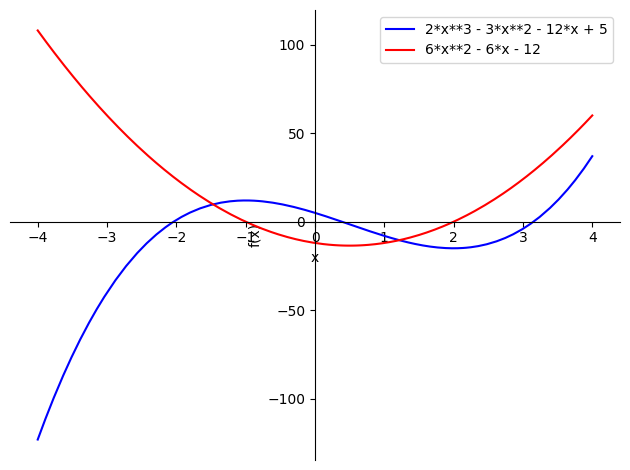

In [7]:
# g とdg のプロットの作成
p = plot(g, dg, (x, -4, 4), legend=True, show=False)
# プロットの色の設定
p[0].line_color = 'b'
p[1].line_color = 'r'
# プロットの表示
p.show()

In [8]:
from sympy import solveset
# solveset を使用して方程式dg = 0 を解く
extremum_pt = solveset(dg)
extremum_pt

{-1, 2}

In [9]:
# 極大値
g.subs(x, extremum_pt.args[0])

12

In [10]:
# 極小値
g.subs(x, extremum_pt.args[1])

-15

# 関数の近似

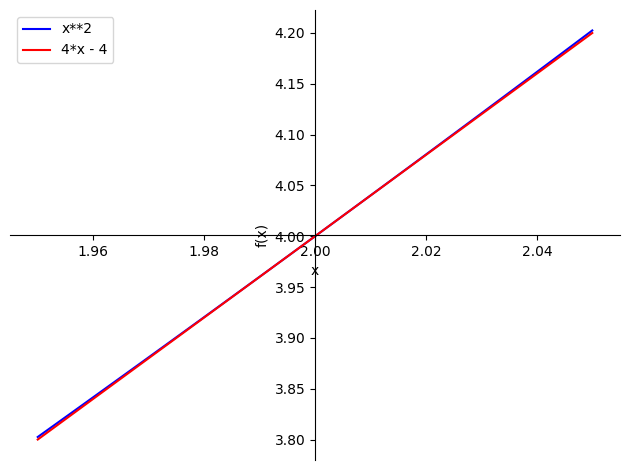

In [11]:
# 接点
a = 2
# 拡大幅(片側)
d = 0.05
p = plot(x**2, line_tangent(x**2, a), (x, a - d, a + d), legend=True, show=False)
# プロットの色の設定
p[0].line_color = 'b'
p[1].line_color = 'r'
# プロットの表示
p.show()

In [12]:
n = symbols('n')
fn = (1 + x) ** n

# x = 0 の1 次近似直線
fn.diff(x).subs(x, 0) * x + fn.subs(x, 0)

n⋅x + 1

In [13]:
100 * (1 + 0.02/100)**30

100.60174325238931

In [14]:
# x = 0.02%は0.0002
100 * (n*x + 1).subs([(x, 0.0002), (n, 30)])

100.600000000000

## $\sin{x}$の1次近似

In [15]:
# 1 次近似関数f(x) x = a で近似する
def lin_approx (f, a):
    return f.diff(x).subs(x, a) * (x-a) + f.subs(x, a)

In [16]:
from sympy import sin

# sin(x) をx=0 で1 次近似
lin_approx(sin(x), 0)

x

# テイラー展開

In [17]:
# factorial : 階乗
from sympy import factorial

# 関数f(x) をx = a でn 次式までテイラー展開
def taylor_expand(f, a, n):
    _series = 0
    # for 文を使用してn 次項まで_series に加算
    for i in range(n + 1):
        _series = _series \
            + f.diff(x, i).subs(x, a)* (x - a)**(i) \
              / factorial(i)
    return _series

In [18]:
# 階乗(factorial) は数値で計算可能
factorial(4)

24

In [19]:
# 文字式の設定が可能
factorial(n)

n!

## 指数関数$e^{x}$のテイラー展開

In [20]:
from sympy import exp
taylor_expand(exp(x), 0, 4)

 4    3    2        
x    x    x         
── + ── + ── + x + 1
24   6    2         

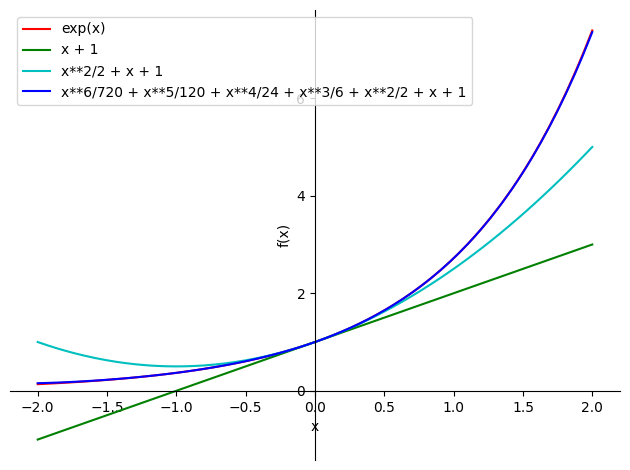

In [21]:
# 指数関数 exp(x) とそのテイラー展開のプロット
p =plot(exp(x),
        taylor_expand(exp(x), 0, 1), #1次
        taylor_expand(exp(x), 0, 2), #2次
        taylor_expand(exp(x), 0, 6), #6次
        (x, -2, 2), legend=True, show=False)

# プロットの色の設定
p[0].line_color = 'r'
p[1].line_color = 'g'
p[2].line_color = 'c'
p[3].line_color = 'b'
# プロットの表示
p.show()

## $\sin{x}$のテイラー展開

In [22]:
taylor_expand(sin(x), 0, 6)

  5    3    
 x    x     
─── - ── + x
120   6     

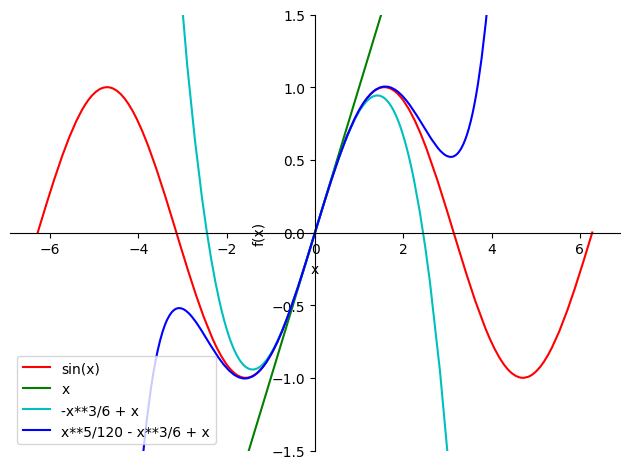

In [23]:
from sympy import pi

p =plot(sin(x),
        taylor_expand(sin(x), 0, 1),
        taylor_expand(sin(x), 0, 3),
        taylor_expand(sin(x), 0, 5),
        (x, -2*pi, 2*pi), legend=True, show=False)

# プロットの色の設定
p[0].line_color = 'r'
p[1].line_color = 'g'
p[2].line_color = 'c'
p[3].line_color = 'b'
p.ylim=(-1.5, 1.5)

# プロットの表示
p.show()

In [24]:
from sympy import series, cos
series(cos(x), x, 0 , 6)

     2    4        
    x    x     ⎛ 6⎞
1 - ── + ── + O⎝x ⎠
    2    24        

オイラーの式

In [25]:
# 虚数I をインポート
from sympy import I

# 虚数の二乗は-1
I**2

-1

In [26]:
series(exp(I*x), x)

           2      3    4      5        
          x    ⅈ⋅x    x    ⅈ⋅x     ⎛ 6⎞
1 + ⅈ⋅x - ── - ──── + ── + ──── + O⎝x ⎠
          2     6     24   120         

In [27]:
from sympy import collect
# collect でi について式を整理する
# removeO でランダウ記号O(x) は表示させない
collect(series(exp(I*x), x).removeO(), I)

 4    2     ⎛  5    3    ⎞    
x    x      ⎜ x    x     ⎟    
── - ── + ⅈ⋅⎜─── - ── + x⎟ + 1
24   2      ⎝120   6     ⎠    